<a href="https://colab.research.google.com/github/savitskaya-om/python/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Cluster_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [49]:
import plotly.express as px

In [2]:
!git clone 'https://github.com/da-python/python-for-data-analytics'

Cloning into 'python-for-data-analytics'...
remote: Enumerating objects: 303, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 303 (delta 79), reused 167 (delta 54), pack-reused 106
Receiving objects: 100% (303/303), 32.27 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [3]:
df = pd.read_csv('python-for-data-analytics/Lesson4/hometask/test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [ ]:
df.info()

In [43]:
df2 = df[0:5000]

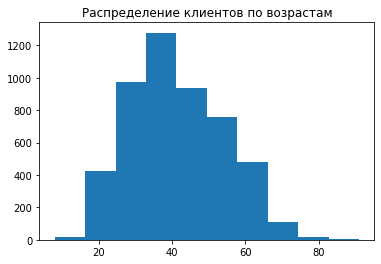

Медианный возраст клиентов - 40 лет.
80% всех клиентов - люди  в возрасте от 25 до 59 лет, при этом 50% всех клиентов - в возрасте от 31 до 51 лет


In [24]:
plt.hist(df2.age)
plt.title ("Распределение клиентов по возрастам")
plt.show()
print (f"Медианный возраст клиентов - {int(df2.age.median())} лет.\n80% всех клиентов - люди  в возрасте от {int(df2.age.quantile(q=0.1))} до {int(df2.age.quantile(q=0.90))} лет, при этом 50% всех клиентов - в возрасте от {int(df2.age.quantile(q=0.25))} до {int(df2.age.quantile(q=0.75))} лет")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



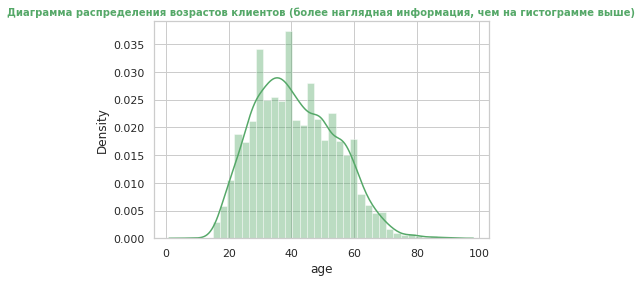

In [58]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df2.age,
    color='g', 
    rug=False, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('Диаграмма распределения возрастов клиентов (более наглядная информация, чем на гистограмме выше)', size=10, color='g', weight='bold')
plt.show();

In [ ]:
df2["age_cat"] = "<30"
df2.loc[(df2.age>30) & (df2.age<=51), "age_cat"] = "31-51"
df2.loc[df2.age>51, "age_cat"] = ">51"

In [65]:
df2.groupby("age_cat").mean()["casa_balance_0m"]

age_cat
31-51    38359.621240
<30      21346.107352
>51      67228.681153
Name: casa_balance_0m, dtype: float64

In [82]:
df2_age_wide = df2.groupby("age_cat").mean()[["casa_balance_0m","loan_balance_0m","dc_trx_sum"]].reset_index()
df2_age_long = pd.melt(df2_age_wide, id_vars='age_cat', value_vars=["casa_balance_0m","loan_balance_0m","dc_trx_sum"])
df2_age_long
fig = px.bar(df2_age_long, x = "age_cat", y = "value", color = "variable", barmode = "relative", facet_row = "variable", category_orders ={"age_cat": ["<30", "31-51",">51"]}, title = "Сравнение активности клиентов из разных возрастных категорий")
fig.show()

In [89]:
gender_cat = df2.groupby("gender").size().reset_index()
fig = px.pie(gender_cat, values = 0, names = "gender")
fig.show()
print("Количество мужчин и женщин среди клиентов банка примерно одинаково")

Количество мужчин и женщин среди клиентов банка примерно одинаково


Почти для всех возрастов средний доход мужчин выше среднего дохода женщин. 
При этом отклонения от среднего дохода у мужчин значительно выше, что также демонстрирует график ниже


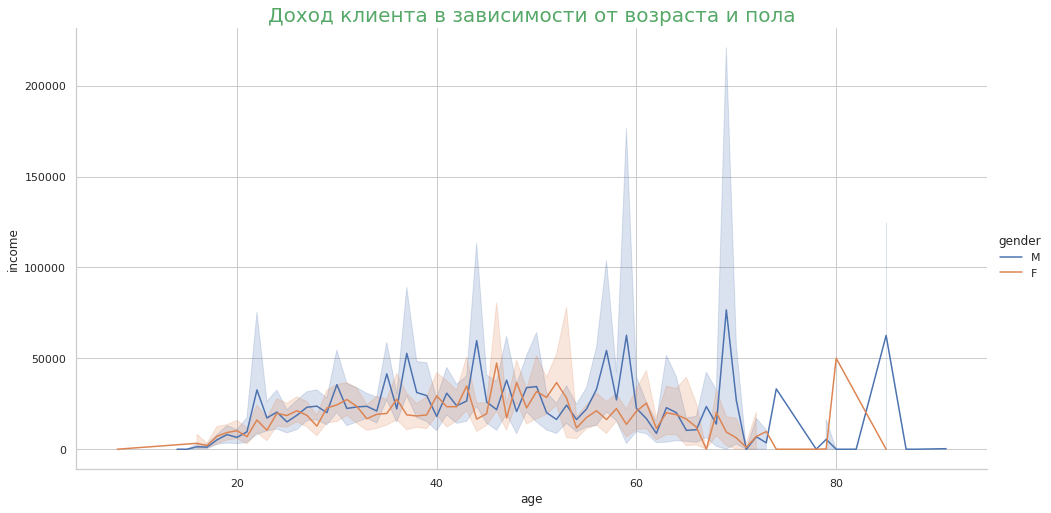

In [85]:
sns.relplot(x=df2.age,
            y=df2.income,
            hue=df2.gender,
            aspect=2,
            height=7,
            kind='line')
plt.title('Доход клиента в зависимости от возраста и пола', size=20, color='g');
print("Почти для всех возрастов средний доход мужчин выше среднего дохода женщин. \nПри этом отклонения от среднего дохода у мужчин значительно выше, что также демонстрируют 2 графика ниже")

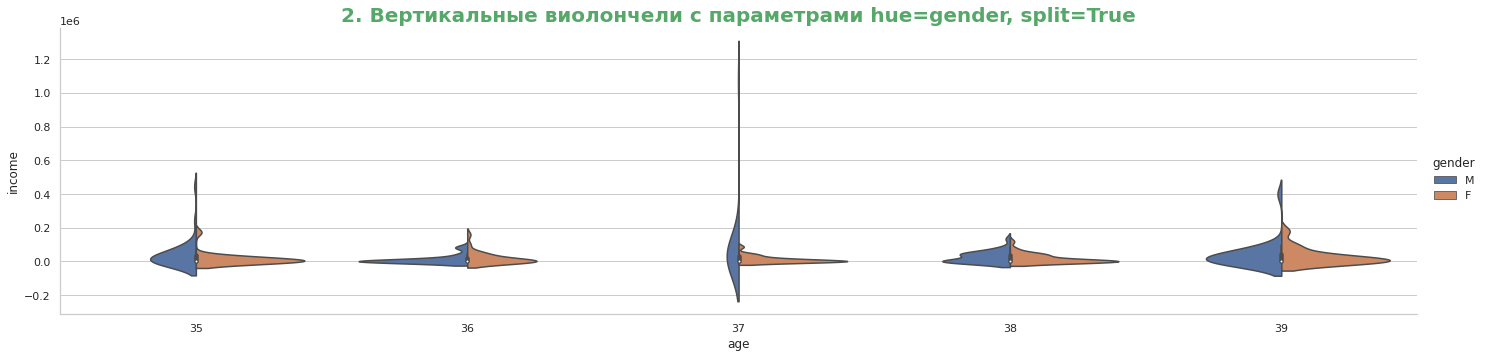

In [54]:
sns.catplot(
    x='age', 
    y='income', 
    data=df2.query("age > 34 and age<40"), 
    kind='violin', 
    hue='gender', 
    split=True, 
    height=5, 
    aspect=4) 

plt.title('Вертикальные виолончели с параметрами hue=gender, split=True', size=20, color='g', weight='bold');

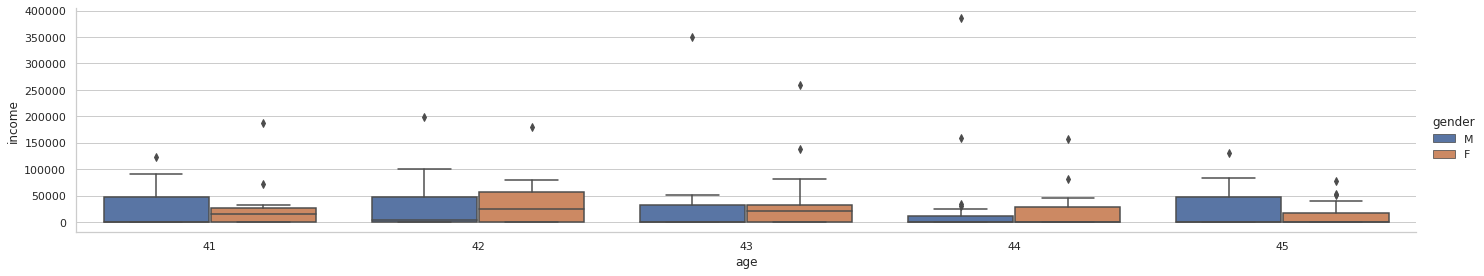

In [44]:
sns.catplot(
    x='age', 
    y='income', 
    data=df2.query("age > 39 and age<46"), 
    kind='box', 
    hue='gender', 
    height=4, 
    aspect=5); 

In [ ]:
df2["full_mob_year"] = df2["full_mob"]//12

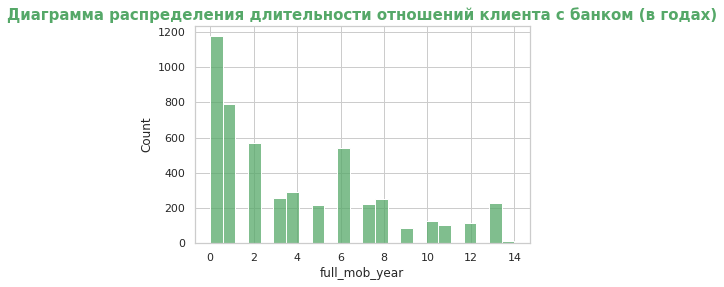

In [99]:
sns.set(style='whitegrid', color_codes=True)

sns.histplot( df2.full_mob_year, color='g')
plt.title('Диаграмма распределения длительности отношений клиента с банком (в годах)', size=15, color='g', weight='bold')
plt.show();

In [ ]:
df2["full_mob_cat"] = ">=3Y"
df2.loc[df2["full_mob"]<=36,"full_mob_cat"] = "2-3Y"
df2.loc[df2["full_mob"]<=24,"full_mob_cat"] = "1-2Y"
df2.loc[df2["full_mob"]<=12,"full_mob_cat"] = "0-1Y"

In [109]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows = 3, cols =1)
fig1 = px.bar(df2, x = "full_mob_cat", y = "dc_trx_sum")
fig2 = px.bar(df2, x = "full_mob_cat", y = "casa_balance_0m")
fig3 = px.bar(df2, x = "full_mob_cat", y = "loan_balance_0m")

fig.add_trace(fig1['data'][0], row = 1, col =1)
fig.add_trace(fig2['data'][0], row = 2, col =1)
fig.add_trace(fig3['data'][0], row = 3, col =1)

fig.show()

print("Анализ активности клиентов (dc_trx_sum, casa_balance_0m, loan_balance_0m) в зависимости от длительности отношений с банком" )

Анализ активности клиентов (dc_trx_sum, casa_balance_0m, loan_balance_0m) в зависимости от длительности отношений с банком


In [123]:
df2[">3Y"] = "<3Y"
df2.loc[df2["full_mob_cat"]==">=3Y", ">3Y"] = ">3Y"
df2_mob_wide = df2.groupby([">3Y","city_type"]).mean()[["casa_balance_0m","loan_balance_0m","dc_trx_sum"]].reset_index()
df2_mob_long = pd.melt(df2_mob_wide, id_vars=[">3Y","city_type"], value_vars=["casa_balance_0m","loan_balance_0m","dc_trx_sum"])
df2_mob_long

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,>3Y,city_type,variable,value
0,<3Y,100-500,casa_balance_0m,20826.291658
1,<3Y,1M+,casa_balance_0m,31568.923496
2,<3Y,500-1000,casa_balance_0m,26580.125381
3,<3Y,<100,casa_balance_0m,13416.434200
4,<3Y,Mega,casa_balance_0m,37651.956324
5,>3Y,100-500,casa_balance_0m,48853.786299
6,>3Y,1M+,casa_balance_0m,76573.386975
7,>3Y,500-1000,casa_balance_0m,40584.354234
8,>3Y,<100,casa_balance_0m,20967.675243
9,>3Y,Mega,casa_balance_0m,136229.053445


In [127]:
fig = px.bar(df2_mob_long, x = ">3Y", y = "value", barmode = "group", color = ">3Y", facet_row = "variable", facet_col = "city_type", category_orders = {"city_type":["<100","100-500","500-1000","1M+","Mega"]})
fig.show()
print("Анализ активности клиентов в зависимости от от города проживания и длительности отношений с банком(>/< 3 лет) ")

Анализ активности клиентов в зависимости от от города проживания и длительности отношений с банком(>/< 3 лет) 


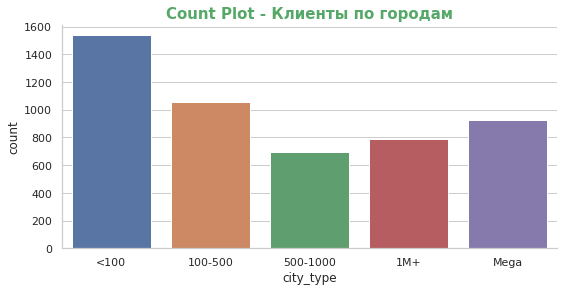

In [128]:
# Count Plot показывает количество наблюдений

sns.catplot(x='city_type', 
            data=df2, 
            kind='count', 
            height=4, 
            aspect=2,
            order = ["<100","100-500","500-1000","1M+","Mega"]
           );  # long form data frame
plt.title('Count Plot - Клиенты по городам', size=15, color='g', weight='bold');